Objetivos:
1. Perceber quais são as horas com mais clientes?
2. Quais são as aulas com mais clientes?
3. Quais são os dias da semana com mais clientes?

Alterações:
1. Colocar a possibilidade de filtrar por datas
2. Utilizar um gráfico bqplot para utilizar e filtrar as datas e atualizar os outros gráficos todos

Problemas bokeh não trabalhar no voilá

# Dados recolhidos aula de grupo RM

In [1]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import plotly.offline as py
import datetime,calendar
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


dfAG = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRTS5OWao3Qq0w6nkKgSgmaWgg4_ALnLGsWf10wuIeSAllFmZIPbuvnI9LSgHN3TSzufsoIVDrDlJNF/pub?gid=1858097418&single=true&output=csv')

## Preparação dos dados

dfAG.columns=['data','dataOld','hora','pessoas','aula']

dfAG.fillna(0,inplace=True)

dfAG.hora=pd.to_datetime(dfAG['hora'])
dfAG.data=pd.to_datetime(dfAG['data'])
dfAG.data=dfAG.data.dt.date
#dfAG.dropna(subset=['hora'],inplace=True)

#Vamos retirar as meias horas
dfAG['hora']=dfAG['hora'].apply(lambda x: x.hour)

### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfAG['diaSemana']=dfAG['data'].apply(lambda x: x.weekday())

#Calcular o mês
dfAG['mes']=dfAG['data'].apply(lambda x: x.month)



In [2]:
cor = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
       'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
       'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
       'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
       'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
       'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
       'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
       'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
       'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
       'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
       'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
       'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
       'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
       'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 
       'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
       'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [3]:
print('Data inicio: ',dfAG.data.min(),'Data fim:',dfAG.data.max())

Data inicio:  2019-12-04 Data fim: 2020-02-29


Os dados são referentes ao período entre data inicio e data fim. Vamos confirmar algums dados

In [4]:
cols = ['aula','pessoas']

dfAG.pessoas=pd.to_numeric(dfAG['pessoas'], errors='coerce',downcast='integer')
#pd.to_numeric(dfAG['pessoas'], errors='coerce')
#dfAG.dropna(subset=['pessoas'],inplace=True)

In [5]:
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
todasAulas = ['sospopeye', 'speeding', 'pilates', 'bodypump', 'step','soscelulite', 'sosabs', 'sosbunda', 
              'bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain', '100stress']
cardio = ['speeding','endurance','bodycombat','zumba', '100stress','step']
forca = ['sospopeye','popeye','sosabs','sosbunda','gain','bodypump','soscelulite','100pança','bunda']
relaxamento = ['bodybalance','yoga','pilates']

opcoes = [('cardio',cardio),('forca',forca),('relaxamento',relaxamento),('todas',todasAulas)]

## Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [6]:
# Vamos selecionar as colunas SOS e sem SOS
comsos= ['soscelulite','sosabs', 'sosbunda', 'sospopeye', 'sosspeeding']
semsos=['popeye', 'speeding', 'pilates', 'bodypump', 'step','bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain','100stress','bunda']

In [7]:
def f(funcao,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [15, 3]
        sns.barplot(x='hora',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo RM')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Clientes por dia semana

In [8]:
def f(funcao,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
        
    plt.rcParams['figure.figsize'] = [15, 3]
    sns.barplot(x='diaSemana',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo RM')
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, funcao=funcao,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Clientes por hora e aula

In [9]:
def f(cor,funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
    plt.rcParams['figure.figsize'] = [15, 6]
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.lineplot(x='hora',y='pessoas',hue='aula',data=dados.loc[dados['aula'].isin(tipo)],palette=cor,
                     estimator=funcao,ci=0).set_title('Aulas Grupo RM - '+str(tipo));
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f,cor=cor,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='cor', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', '…

In [10]:
def f(aula,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y='pessoas',hue='aula',data=dfAG[dfAG.aula==aula],palette='rainbow',
                 estimator=funcao,ci=0).set_title('Sala de exercicio RM');
    
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, aula=dfAG.aula.unique(),funcao=funcao);

interactive(children=(Dropdown(description='aula', options=('popeye', 'zumba', 'speeding', 'gain', 'pilates', …

### Quais são as aulas com mais alunos por dia da semana?

In [11]:
def f(funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]    
    plt.rcParams['figure.figsize'] = [20, 5]
    #plt.xticks(rotation=45);
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.barplot(x='aula',y='pessoas',hue='diaSemana',
                    data=dados.loc[dados['aula'].isin(tipo)],
                    palette='Accent',estimator=funcao).set_title('Sala exercício RM')
    
        fig = plt.gcf() # "Get current figure"
    

interact(f,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Mapa de utilização 

In [12]:
dfAG['dia']=dfAG['data'].apply(lambda x: x.day)

In [13]:
diaSemana = [('seg',0),
          ('ter',1),
          ('qua',2),
          ('qui',3),
          ('sex',4),
          ('sab',5),
          ('dom',6)]

In [14]:
#np.round(pd.pivot_table(dfAG,values='pessoas',index='hora',columns=['aula'],aggfunc=np.mean,margins=True,fill_value=0))

In [15]:
def f(funcao,dia,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        dados=dados.loc[dados['diaSemana']==dia]
        quadro = np.round(pd.pivot_table(dados,values='pessoas',index='hora',columns=['aula'],aggfunc=funcao,margins=True,fill_value=0))
        #print(quadro)
        print(tabulate(quadro,tablefmt='github',floatfmt=".2f",headers=quadro.columns))
        #print('\nPor dia do mês:')
        #quadro2 = pd.pivot_table(dados,values='pessoas',index='hora',columns=['dia'],aggfunc=funcao,margins=True,fill_value=0)
        #print(tabulate(quadro2,floatfmt=".1f",headers=['hora']+list(range(dados.dia.min(),dados.dia.max()+1))+['total']))
        quadro.to_html()

interact(f, funcao=funcao,dia=diaSemana,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Evolução clientes aulas de grupo

### Dados históricos

In [16]:
#dfAG.groupby('data')['pessoas'].sum().reset_index()

In [17]:
dfAG.head()

,data,dataOld,hora,pessoas,aula,diaSemana,mes,dia
0,2019-12-04,2019/12/04,15,10,popeye,2,12,4
1,2019-12-04,2019/12/04,19,30,zumba,2,12,4
2,2019-12-09,2019/12/09,8,6,speeding,0,12,9
3,2019-12-09,2019/12/09,9,4,gain,0,12,9
4,2019-12-09,2019/12/09,10,3,pilates,0,12,9


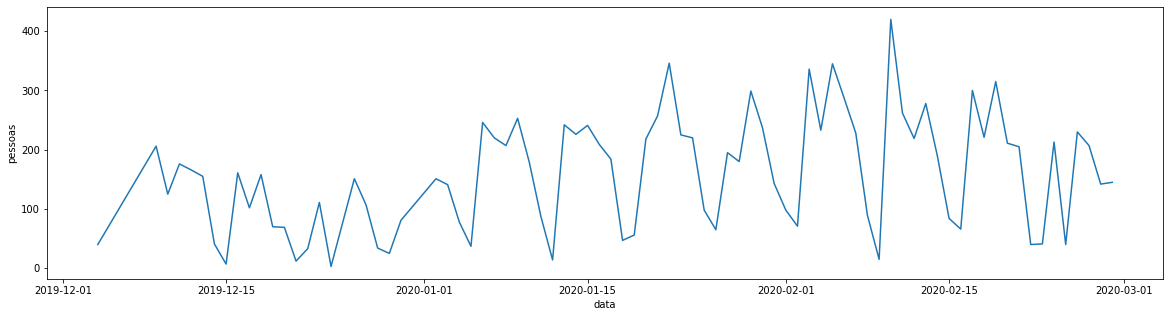

In [18]:
sns.lineplot(x="data", y="pessoas", data=dfAG.groupby('data')['pessoas'].sum().reset_index());

In [19]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.models import HoverTool
#from bqplot import pyplot as plt
#import ipywidgets as widgets
#
#output_notebook()
#
#def f(aula):
#    dados=dfAG[dfAG.aula==aula]
#    dados = dados.groupby('data')['pessoas'].sum().reset_index()
#    # Format the tooltip
#    tooltips = [("valor", "@pessoas")]
#
#    plot = figure(title='Evolução clientes', x_axis_label='Data',y_axis_label='Clientes',plot_width=1100,plot_height=300,x_axis_type="datetime")
#    plot.xaxis.major_label_orientation = 3.14/2
#    plot.xaxis.ticker.desired_num_ticks = int(len(dfAG.data.unique()))
#    plot.line('data', 'pessoas', line_width=2, line_color='orange', legend_label='total clientes',source=dados)
#    plot.add_tools(HoverTool(tooltips=tooltips))
#    plot.circle('data', 'pessoas',source=dados)
#
#    show(plot)
#
#interact(f, aula=dfAG.aula.unique());
#
#

In [20]:
#import warnings
#warnings.simplefilter('ignore')

In [21]:
##!pip install fbprophet
#from fbprophet import Prophet
#
#dados = dfAG.groupby('data')['pessoas'].sum().reset_index()
#    
## Renomear as colunas
#dados.columns = ['ds','y']
## Instanciação
#pro = Prophet()
#pro.fit(dados)
#
#future = pro.make_future_dataframe(periods=60,freq='D')
##print(future.tail())
#forecast = pro.predict(future)
#fig1=pro.plot(forecast)

# Dados recolhidos aula de grupo Alv

In [22]:
pd.to_datetime(dfAG['hora'], errors='coerce')

0      1970-01-01 00:00:00.000000015
1      1970-01-01 00:00:00.000000019
2      1970-01-01 00:00:00.000000008
3      1970-01-01 00:00:00.000000009
4      1970-01-01 00:00:00.000000010
                    ...             
1268   1970-01-01 00:00:00.000000018
1269   1970-01-01 00:00:00.000000010
1270   1970-01-01 00:00:00.000000010
1271   1970-01-01 00:00:00.000000010
1272   1970-01-01 00:00:00.000000011
Name: hora, Length: 1273, dtype: datetime64[ns]

In [23]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import plotly.offline as py
import datetime,calendar
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


dfAG = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5UTTnPnInrXgEB7IQxfNSckso1xmFL9ZQYea2doSq4Lk2CpWeeFgyNAWsMtXsK_SwrwPtrGeTXj-k/pub?gid=1187849082&single=true&output=csv')

## Preparação dos dados

dfAG.columns=['data','dataOld','hora','pessoas','aula']

dfAG.fillna(0,inplace=True)

dfAG.hora=pd.to_datetime(dfAG['hora'], errors='ignore')
dfAG.data=pd.to_datetime(dfAG['data'], errors='ignore')
dfAG.data=dfAG.data.dt.date



#Vamos retirar as meias horas
dfAG['hora']=dfAG['hora'].apply(lambda x: x.hour)
dfAG['hora'] = dfAG['hora'].astype(int)
### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfAG['diaSemana']=dfAG['data'].apply(lambda x: x.weekday())

#Calcular o mês
dfAG['mes']=dfAG['data'].apply(lambda x: x.month)



In [24]:
print('Data inicio: ',dfAG.data.min(),'Data fim:',dfAG.data.max())

Data inicio:  2019-12-09 Data fim: 2020-02-29


Os dados são referentes ao período entre data inicio e data fim. Vamos confirmar algums dados

In [25]:
cols = ['aula','pessoas']

dfAG.pessoas=pd.to_numeric(dfAG['pessoas'], errors='coerce',downcast='integer')
#pd.to_numeric(dfAG['pessoas'], errors='coerce')
#dfAG.dropna(subset=['pessoas'],inplace=True)

In [26]:
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
todasAulas = ['sospopeye', 'speeding', 'pilates', 'bodypump', 'step','soscelulite', 'sosabs', 'sosbunda', 
              'bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain', '100stress']
cardio = ['speeding','endurance','bodycombat','zumba', '100stress','step']
forca = ['sospopeye','popeye','sosabs','sosbunda','gain','bodypump','soscelulite','100pança','bunda']
relaxamento = ['bodybalance','yoga','pilates']

opcoes = [('cardio',cardio),('forca',forca),('relaxamento',relaxamento),('todas',todasAulas)]

## Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [27]:
# Vamos selecionar as colunas SOS e sem SOS
comsos= ['soscelulite','sosabs', 'sosbunda', 'sospopeye', 'sosspeeding']
semsos=['popeye', 'speeding', 'pilates', 'bodypump', 'step','bodybalance', 'endurance','bodycombat', 'zumba', '100pança', 'gain','100stress','bunda']

In [28]:
def f(funcao,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        plt.rcParams['figure.figsize'] = [15, 3]
        sns.barplot(x='hora',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo Alv')
        plt.xticks(rotation=0);
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f, funcao=funcao,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Clientes por dia semana

In [29]:
def f(funcao,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
        
    plt.rcParams['figure.figsize'] = [15, 3]
    sns.barplot(x='diaSemana',y='pessoas',data=dados,palette='rainbow',estimator=funcao).set_title('Aulas de Grupo Alv')
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, funcao=funcao,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Clientes por hora e aula

In [30]:
def f(cor,funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]
    plt.rcParams['figure.figsize'] = [15, 6]
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.lineplot(x='hora',y='pessoas',hue='aula',data=dados.loc[dados['aula'].isin(tipo)],palette=cor,
                     estimator=funcao,ci=0).set_title('Aulas Grupo Alv - '+str(tipo));
        fig = plt.gcf() # "Get current figure"
        plt.show()

interact(f,cor=cor,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='cor', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', '…

In [31]:
def f(aula,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y='pessoas',hue='aula',data=dfAG[dfAG.aula==aula],palette='rainbow',
                 estimator=funcao,ci=0).set_title('Sala de exercicio Alv');
    
    fig = plt.gcf() # "Get current figure"
    plt.show()

interact(f, aula=dfAG.aula.unique(),funcao=funcao);

interactive(children=(Dropdown(description='aula', options=('sosabs', 'endurance', 'sosbunda', 'sospanda', 'bo…

### Quais são as aulas com mais alunos por dia da semana?

In [32]:
def f(funcao,tipo,sos):
    if sos == True:
        dados=dfAG.loc[dfAG['aula'].isin(comsos)]
    else:
        dados=dfAG.loc[dfAG['aula'].isin(semsos)]    
    plt.rcParams['figure.figsize'] = [20, 5]
    #plt.xticks(rotation=45);
    if dados.loc[dados['aula'].isin(tipo)].empty:
        print('Não tem dados')
    else:
        sns.barplot(x='aula',y='pessoas',hue='diaSemana',
                    data=dados.loc[dados['aula'].isin(tipo)],
                    palette='Accent',estimator=funcao).set_title('Sala exercício Alv')
    
        fig = plt.gcf() # "Get current figure"
    

interact(f,funcao=funcao,tipo=opcoes,sos=True);

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Mapa de utilização 

In [33]:
dfAG['dia']=dfAG['data'].apply(lambda x: x.day)

In [34]:
#dfAG.head()

In [35]:
#dfAG.diaSemana.value_counts()

In [36]:
def f(funcao,dia,sos,porMes,mes):
    if porMes == True:
        dados = dfAG.loc[dfAG['mes'] == mes]
    else:
        dados = dfAG
    if sos == True:
        dados=dados.loc[dados['aula'].isin(comsos)]
    else:
        dados=dados.loc[dados['aula'].isin(semsos)]
        
    if dados.empty:
        print('Não tem dados')
    else:
        dados=dados.loc[dados['diaSemana']==dia]
        quadro = np.round(pd.pivot_table(dados,values='pessoas',index='hora',columns=['aula'],aggfunc=funcao,margins=True,fill_value=0))
        #print(quadro)
        print(tabulate(quadro,tablefmt='github',floatfmt=".2f",headers=quadro.columns))
        #print('\nPor dia do mês:')
        #quadro2 = pd.pivot_table(dados,values='pessoas',index='hora',columns=['dia'],aggfunc=funcao,margins=True,fill_value=0)
        #print(tabulate(quadro2,floatfmt=".1f",headers=['hora']+list(range(dados.dia.min(),dados.dia.max()+1))+['total']))
        quadro.to_html()

interact(f, funcao=funcao,dia=diaSemana,sos=True,porMes=True,mes=widgets.IntSlider(min=1,max=12,step=1,value=1));

interactive(children=(Dropdown(description='funcao', options=(('soma', <function sum at 0x00000130B6A69AF8>), …

## Evolução clientes aulas de grupo

### Dados históricos

In [37]:
#dfAG.groupby('data')['pessoas'].sum().reset_index()

In [38]:
#sns.lineplot(x="data", y="pessoas", data=dfAG.groupby('data')['pessoas'].sum().reset_index());

In [39]:
data=dfAG.groupby('data')['pessoas'].sum().reset_index()

In [40]:
data.data = pd.to_datetime(data['data'], errors='ignore')

In [41]:
from bqplot import pyplot as iplt
import ipywidgets as widgets
import numpy as np

fig_lines = iplt.figure(title='Dados históricos')
fig_lines.layout.height ='300px'
fig_lines.layout.width = '800px'
lines = iplt.plot(x=data.data, y=data.pessoas )
fig_lines

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 6…

In [42]:
#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.models import HoverTool
#
#output_notebook()
#
#def f(aula):
#    dados=dfAG[dfAG.aula==aula]
#    dados = dados.groupby('data')['pessoas'].sum().reset_index()
#    # Format the tooltip
#    tooltips = [("valor", "@pessoas")]
#
#    plot = figure(title='Evolução clientes', x_axis_label='Data',y_axis_label='Clientes',plot_width=1100,plot_height=300,x_axis_type="datetime")
#    plot.xaxis.major_label_orientation = 3.14/2
#    plot.xaxis.ticker.desired_num_ticks = int(len(dfAG.data.unique()))
#    plot.line('data', 'pessoas', line_width=2, line_color='orange', legend_label='total clientes',source=dados)
#    plot.add_tools(HoverTool(tooltips=tooltips))
#    plot.circle('data', 'pessoas',source=dados)
#
#    show(plot)
#
#interact(f, aula=dfAG.aula.unique());
#
#

In [43]:
#import warnings
#warnings.simplefilter('ignore')

In [44]:
#!pip install fbprophet
#from fbprophet import Prophet

#dados = dfAG.groupby('data')['pessoas'].sum().reset_index()
#    
## Renomear as colunas
#dados.columns = ['ds','y']
## Instanciação
#pro = Prophet()
#pro.fit(dados)
#
#future = pro.make_future_dataframe(periods=60,freq='D')
##print(future.tail())
#forecast = pro.predict(future)
#fig1=pro.plot(forecast)

In [45]:
#fig2=pro.plot_components(forecast)